

# Question 7

Using your function, construct Recovery Curves split by year of default ("Default Vintage")

In [12]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from portfolio_model import Loans_Portfolio

In [12]:
mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'


pd.options.mode.copy_on_write = True 
pd.options.display.float_format = "{:,.2f}".format

In [13]:
cob = datetime.date(2022, 12, 31) # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'

In [14]:
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [15]:
RC = portfolio.construct_recovery_curve()  # This will be a bit slow the first time it runs since it has to create the enriched data first.

In [16]:
RC.head()

,recovery_curve
-50,0.00
-49,0.00
-48,0.00
-47,0.00
-46,0.00


Let's plot this only for the time after default, i.e. when number of months is positve.

In [22]:
RC[RC.index > 0]

,recovery_curve
1,0.00
2,0.00
3,0.31
4,0.46
5,0.54
6,0.61
7,0.74
8,0.74
9,0.76
10,0.79


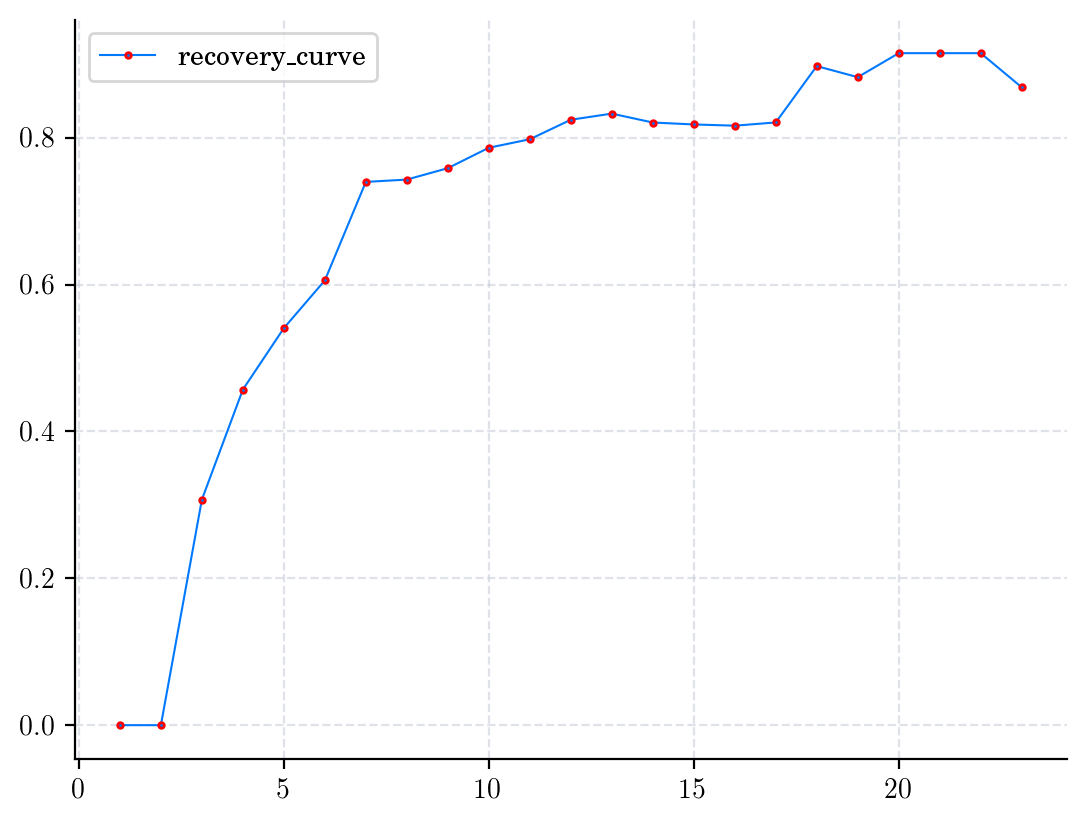

In [17]:
RC[RC.index > 0].plot(style='-o', ms=2, mec='r')
plt.show()

In [18]:
RC_by_default_year = portfolio.construct_recovery_curve(pivots=['year_of_default'])

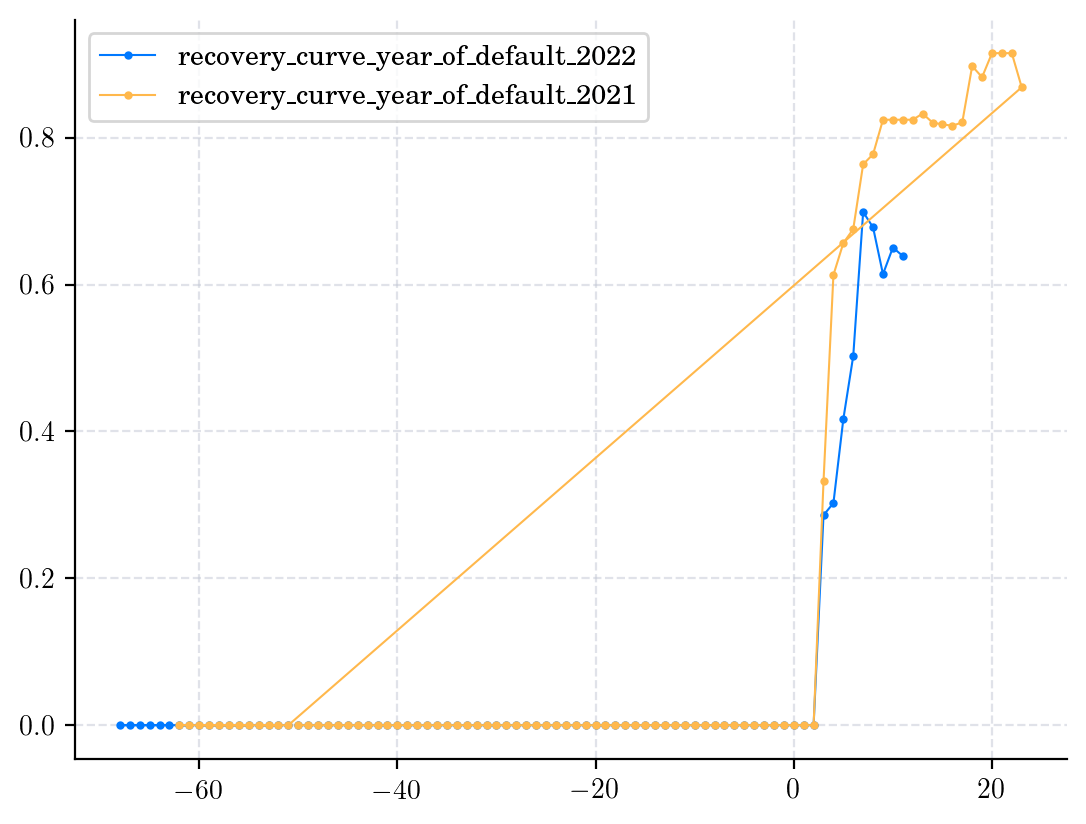

In [19]:
RC_by_default_year.plot(style='-o', ms=2,)
plt.show()

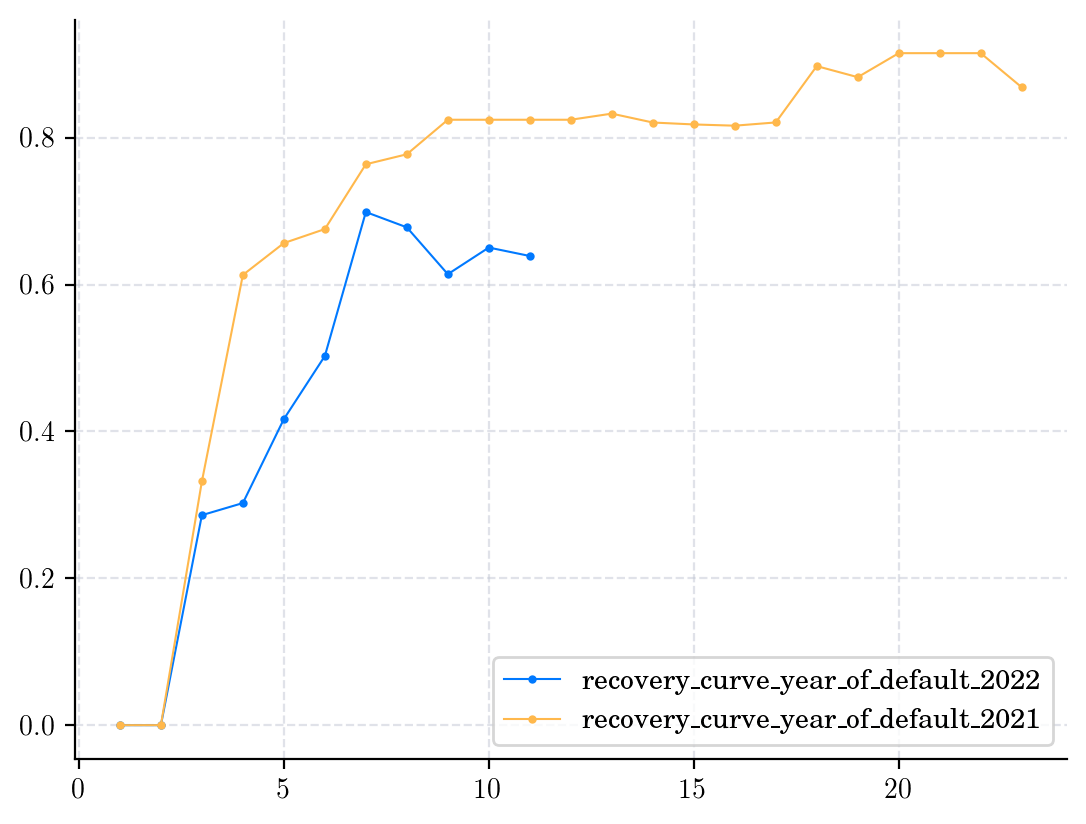

In [20]:
RC_by_default_year[RC_by_default_year.index > 0].plot(style='-o', ms=2)
plt.show()

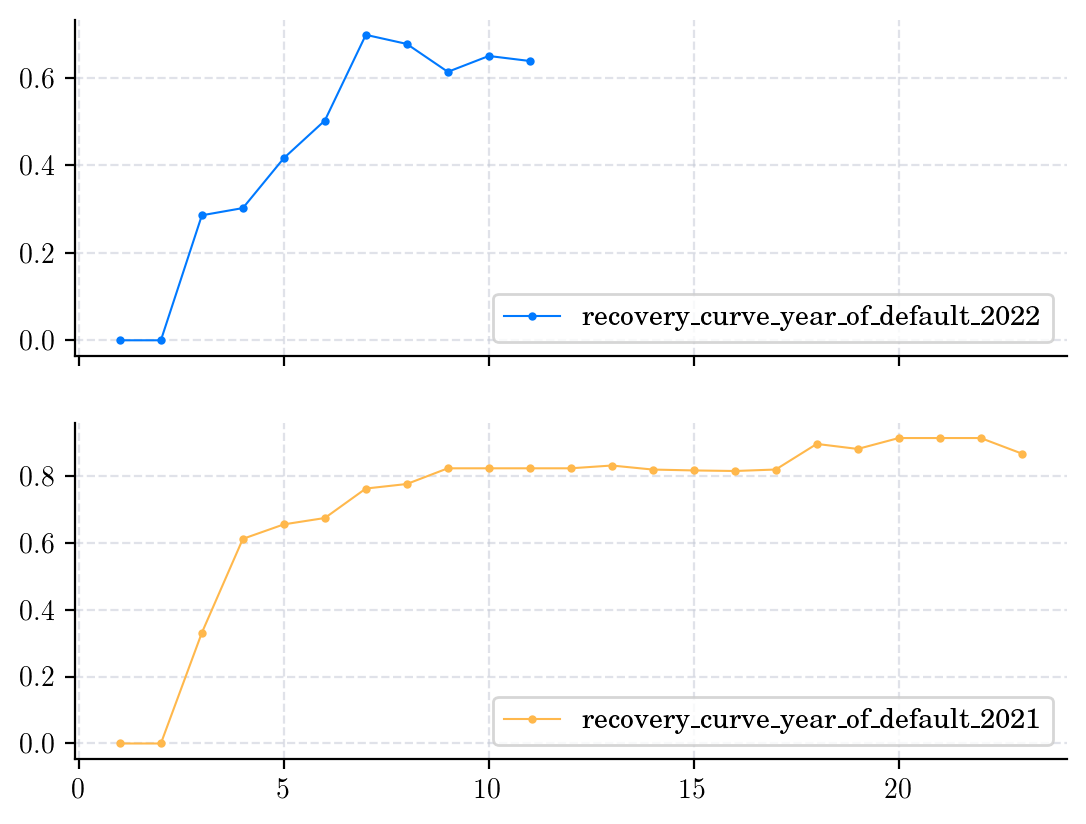

In [21]:
RC_by_default_year[RC_by_default_year.index > 0].plot(subplots=True, style='-o', ms=2)
plt.show()

In [23]:
RC_by_default_year[RC_by_default_year.index > 0]

,recovery_curve_year_of_default_2022,recovery_curve_year_of_default_2021
1,0.00,0.00
2,0.00,0.00
3,0.29,0.33
4,0.30,0.61
5,0.42,0.66
6,0.50,0.68
7,0.70,0.76
8,0.68,0.78
9,0.61,0.82
10,0.65,0.82


In [25]:
test = portfolio.enriched_data_defaulted

In [26]:
test [ test.year_of_default == 2022]

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent,months_since_default,year_of_default
55,3,2018-02-28,"89,311.00",NaN,0.00,2018-02-28,2020-12-31,2020-02-28,89311,1,...,False,-24,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-50,2022
56,3,2018-03-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,False,-23,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-49,2022
57,3,2018-04-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,False,-22,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-48,2022
58,3,2018-05-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,False,-21,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-47,2022
59,3,2018-06-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,False,-20,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-46,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,-15,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,-1,2022
41748,1606,2022-09-30,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,-14,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,0,2022
41749,1606,2022-10-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,-13,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,1,2022
41750,1606,2022-11-30,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,-12,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,2,2022


In [27]:
test.loan_id.unique()

array([   3,   38,   52,   89,   92,   93,  154,  178,  199,  208,  212,
        222,  227,  292,  299,  313,  338,  361,  372,  429,  445,  469,
        478,  512,  516,  577,  614,  641,  648,  666,  681,  685,  692,
        696,  702,  704,  706,  748,  835,  844,  846,  855,  864,  903,
        946,  974,  996, 1085, 1119, 1120, 1177, 1188, 1212, 1215, 1239,
       1331, 1372, 1386, 1397, 1430, 1433, 1560, 1567, 1606])

In [33]:
test[test.months_since_default == 9][['loan_id', 'postdefault_recoveries',
                                       'recovery_percent', 'exposure_at_default', 'recovery_in_month', 'recovery_cumsum']]

,loan_id,postdefault_recoveries,recovery_percent,exposure_at_default,recovery_in_month,recovery_cumsum
1447,52,0.00,0.00,"195,384.53",0.00,0.00
3836,154,"107,836.43",1.00,"107,899.28",0.00,"107,836.43"
4452,178,"60,572.62",0.78,"77,787.62",0.00,"60,572.62"
5085,208,"77,865.81",0.65,"119,855.09",0.00,"77,865.81"
5362,222,"120,406.96",0.96,"125,807.13",0.00,"120,406.96"
5487,227,"78,342.03",0.85,"92,112.14",0.00,"78,342.03"
7078,292,0.00,0.00,"123,598.37",0.00,0.00
8322,338,"64,596.65",0.67,"96,832.00",0.00,"64,596.65"
8828,361,"68,509.10",1.02,"67,321.71",0.00,"68,509.10"
9057,372,"44,912.83",0.65,"69,604.89",0.00,"44,912.83"


In [37]:
print(sum(test[test.months_since_default == 9].recovery_cumsum))
print(sum(test[test.months_since_default == 9].exposure_at_default))

3510415.932287542
4628336.355265119


In [38]:
print(sum(test[test.months_since_default == 10].recovery_cumsum))
print(sum(test[test.months_since_default == 10].exposure_at_default))

3199221.6995908236
4068887.950744787


In [34]:
test[test.months_since_default == 10][['loan_id', 'postdefault_recoveries',
                                       'recovery_percent', 'exposure_at_default', 'recovery_in_month', 'recovery_cumsum']]

,loan_id,postdefault_recoveries,recovery_percent,exposure_at_default,recovery_in_month,recovery_cumsum
3837,154,"107,836.43",1.00,"107,899.28",0.00,"107,836.43"
4453,178,"60,572.62",0.78,"77,787.62",0.00,"60,572.62"
5086,208,"77,865.81",0.65,"119,855.09",0.00,"77,865.81"
5363,222,"120,406.96",0.96,"125,807.13",0.00,"120,406.96"
5488,227,"78,342.03",0.85,"92,112.14",0.00,"78,342.03"
7079,292,0.00,0.00,"123,598.37",0.00,0.00
8323,338,"64,596.65",0.67,"96,832.00",0.00,"64,596.65"
8829,361,"68,509.10",1.02,"67,321.71",0.00,"68,509.10"
9058,372,"44,912.83",0.65,"69,604.89",0.00,"44,912.83"
10311,429,"178,058.18",0.79,"226,577.97",0.00,"178,058.18"
